In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
from data_generators import get_train_test_sorting
from data_generators import get_train_test_addition
from training import *

## Oppgave 1 - Forstå hvordan datasettene og transformermodellen er strukturert

-----------------------------------------------------------------------------------------
##### 1.1 Gi et eksempel (som i likning $(10)$) på hvordan et datasett ${x, y}$ ville sett ut for å trene en transformermodell for å predikere et heltall $d$ gitt $d = a · b + c$ der $a, c$ er tosifrede heltall, mens $b$ er et ettsifret heltall, altså $9 ≥ b ∈ Z$.

Et sett av treningsdata kan genereres ved å la x bestå av sifrene i $a, b, c$ og alle sifrene i $d$ med unntak av det siste og lar $y = d$. Dermed vil formen for x være gitt ved $x = [a_0 , \cdot \cdot \cdot, a_{r-1}, b_0, \cdot \cdot \cdot, b_{r-1}, c_0, \cdot \cdot \cdot, c_{r-1}, d_0, \cdot \cdot \cdot, d_{r-1}]$. Gitt betingelsene i oppgaven over, la $r$ = 2, $a$ = 24, $b$ = 4, $c$ = 15 og dermed <br> $d$ = 111.  som gir oss x = $[2, 4, 4, 1, 5, 1, 1]$ og $y = [1, 1, 1]$. Merk at siste siffer i $d$ ikke er del av datasettet i x.  Modellen skal da gi $\hat{z}$. Lengden av $\hat{z}$, $n$, vil være gitt av lengden av x som har med lengden $n$. $\hat{z}$ = [$\hat{z}_0$, \cdot \cdot \cdot, $\hat{z}_5$] =  $f_{\theta}([2, 4, 4, 1, 5, 1, 1])$. Ideelt er $\theta$ optimert til en slik grad at <Br> $\hat{y} = [\hat{z}_3, \hat{z}_4, \hat{z}_5] = [1, 1, 1] = y$ er korrekt predikert.

-----------------------------------------------------------------------------------------
##### 1.2) Når optimeringen er ferdig, hvordan kan vi bruke modellen $f_{\theta}$  til å predikere $d$ gitt $a, b, c$? Vis dette med et eksempel, på samme måte som i likning $(11)$.

Gitt at optmeringen er ferdig, kan modellen korrekt predikere $d$. Denne prossesen av å predikere de neste sifferene i seqvensen gjøres fra å lære av de oppgitte datasettene. Følgende tabell viser hvordan dette fungerer. La verdiene være det samme som i forrige oppgave, $r = 2, a = 24, b = 4,$<Br> $c = 15$

| Iterasjoner | Modell |
|----------|----------|
| $x^{(0)} = [2, 4, 0, 4, 1, 5]$ | $[\hat{z}_0^{(0)}, \hat{z}_1^{(0)}, \hat{z}_2^{(0)}, \hat{z}_3^{(0)}] = f_{\theta}(x^{(0)})$|
| $x^{(1)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}]$ | $[\hat{z}_0^{(1)}, \cdot \cdot \cdot, \hat{z}_4^{(1)}] = f_{\theta}(x^{(1)})$ |
| $x^{(2)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}, \hat{z}_4^{(1)}]$ | $[\hat{z}_0^{(2)}, \cdot \cdot \cdot, \hat{z}_5^{(2)}] = f_{\theta}(x^{(2)})$  |
| $x^{(3)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}, \hat{z}_4^{(1)}, \hat{z}_5^{(2)}]$ |  |

Disse predikasjonene hentes ut og returneres som $\hat{y} = [\hat{z}_3^{(0)}, \hat{z}_4^{(1)}, \hat{z}_5^{(2)}]$ som bør være likt $y$.

-----------------------------------------------------------------------------------------
##### 1.3) Anta at vi bruker cross-entropy som objektfunksjon, at $m = 5$ og $y = [4, 3, 2, 1]$. Hvilke diskret sannsynlighetsfordeling $\hat{Y}$ ville gitt en objektfunksjon $L(θ, D) = 0$? Hva ville $\hat{y}$ vært i dette tilfellet?

Cross entropy er gitt ved $L(θ, D) = -\frac{1}{D \cdot n} \sum_{i=0}^{D-1} \sum_{j=0}^{n-1} \log \hat{Y}_{k,j}^{(i)}$ hvor $D$ er datapunktene, $\theta $
er parameterne, og $\hat{Y}$ er sannsynlighetsfordelingen til den predikterte modellen, samt er $j$ og $i$ dimensjonene til $\hat{Y}$. Det objektfunksjonen gjør er å sammenligne onehot(y) med $\hat{Y}$. Hvis $L(θ, D) = 0$ vil den optimerte modellen og onehot(y) være identiske. Når dette inntreffer vil $argmax_{\text{col}}(\hat{Y})$ = $\hat{y}$ som igjen er lik $y$. I dette tilfellet er $y = [4,3,2,1]$, som også vil være lik $\hat{y}$.
$\hat{Y}$ vil være gitt av den diskrete sannsynlighetsfordelingen:<Br><Br> $\hat{Y}$ =
$\left[\begin{array}{ccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{array}\right]$ , <Br><Br> som er lik onehot($[4,3,2,1]$). Dette betyr i praksis at paramtetrene i transformenmodellen klarer å prediktere hva som kommer videre i sekvensen og vi ender opp med samme antatt løsning ($\hat{y}$) som faktisk løsning.




-----------------------------------------------------------------------------------------
##### 1.4) Gitt $d, m, n_{max}, k, p$ og $L$. Hvor mange enkeltparametre har en transformermodell? Med enkeltparametre mener vi hvor mange tall $w ∈ R$ vi må bestemme ved optimering. En matrise $W ∈ R^{m×n}$ består av $m · n$ tall eller enkeltparametre.

Med gitte variabler for $d, m, n_{max}, k, p$ og  $L$ er antall enkeltparametre mulig å bestemme. Enkeltparametre er gitt med $w \in \mathbb{R}$ noe som uttrykkes med å se på dimensjoner for ulike parametermatriser i transformermodellen.

$W_E$ og $W_P$ har henholdsvis dimensjonene $W_E \in \mathbb{R}^{d \times m}$ og $ W_P \in \mathbb{R}^{d \times n_{max}} $ som representerer parametermatrisen til en sekvens for x med lengde n, som skrives som $z_0$. I tilegg ønskes det å gjøre $L$ paramtriserte trasformasjoner på $z_0$, så man ender opp med $L \cdot (d \times m + d \times n_{max})$ for embedding delen av enkeltparamtrene. Under unenbeddingen oppstår en ny parametermatrise $W_U$ som er en sekvens med lengde $n$ med heltall opp til $m$, den har dimensjonene $ W_U \in \mathbb{R}^{d \times m} $. Attention-lag bidrar også til antall enkeltparamtre for transformmodellen, der har man 4 parametermatriser; $W_O, W_V, W_Q, W_K$ alle med samme dimensjon $\mathbb{R}^{k \times d} $. Transformermodellen har også en $feed$-$forward $ del som bidrar med to paramtermatriser $W_1$ og $W_2$ begge med dimensjoner $\mathbb{R}^{p \times d} $


Hvis man tar disse parametermatrisene i betrakning og antar at $k < d < p$ vil man ha: 
$w = d \times m+L\cdot (d \times m + d \times n_{max}) + 4 \cdot k \times d + 2 \cdot p \times d $, enkeltparametre. (siden k og p er heltall man bestemmer selv er dette en rimelig antagelse å ta).


-----------------------------------------------------------------------------------------
##### 1.5 Transformermodellen er gitt i likningene $(4) - (9)$. La $n = n_{max} = 1,$  $m = d = k = p=2$ og $L=1$. Anta videre at $W_O = W_V = W_Q = W_K = W_1 = W_2 = W_U = I_{2×2}$ og at $σ(x) = Relu(x) = max(0, x)$. Dersom <Br> $W_E = \left[\begin{array}{ccc} 1 & 0 \\ 0 & \alpha \end{array} \right]$ , og $W_P$ = $\left[\begin{array}{ccc} 1 \\ 0 \end{array} \right]$ vis at vi må ha $\alpha > 1$ for å få  $\hat{z} = [1]$ som output når input er $x = [1]$.

Med variablene oppgitt i oppgaven $L=n = n_{max}= x = 1$ og $m=d=k=p=d = 2$ og alle parametermatrisene lik

$\left[\begin{array}{ccc}
1 & 0 \\
0 & 1 
\end{array}\right]$ = $ I_{2\times 2}$ , utenom $W_E = \left[\begin{array}{ccc}
1 & 0 \\
0 & \alpha
\end{array}\right]$ , og $W_P = \left[\begin{array}{ccc}
1 \\
0 
\end{array}\right]$

Med dette oppgitt vil  $ X = onehot(x) = \left[\begin{array}{ccc}0 \\1 
\end{array}\right]$ som resulterer i en $z_0 = \left[\begin{array}{ccc}0 \\ \alpha 
\end{array}\right]+ \left[\begin{array}{ccc}1 \\ 0 
\end{array}\right]$ =$\left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$. For å videre bestemme et uttrykk for $\hat{z}$ må vi se på hva transformermodellen gjør med $z_0$. 

Videre er $z_{1/2}$ = $z_0 + W_O^T  W_V  z_0 A(z_0)$, hvor $A(z_0)$ = $softmax_{col}(z_0^T W_Q^T W_K z_0+D)$ og D sørger for at den strengt nedre delen av A er 0.
Ved å løse $A(z_0)$ får man utrykket $(1+ \alpha ^2)$ i softmax funksjonen.

$z_{1/2} = \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right] + I_{2 \times 2} I_{2 \times 2} \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right] softmax(1+ \alpha ^2)$ = $ 2 \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$ ettersom softmax av et utrykk tilsvarer å dele på seg selv i e-potens, som resulterer at utrykket blir lik 1.

for $z_1$ får vi et uttrykk som er $z_{1/2} + W_2^T \sigma (W_1 z_{1/2})$, $\sigma$ er en aktiveringsfunskjon, i dette tilfelle kan man bruke $relu(W_1 z_{1/2})$.
Utrykket blir da:

$z_1 = 2  \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]+ I_{2 \times 2} max(0,I_{2 \times 2} 2 \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]) $ = $ 4  \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$
 
Ved hjelp av $z_1$ kan man ta i bruk likning $(8)$ for å finne sannsynlighetsfunksjonen $Z$.

 $Z = softmax_{col}(W_U^T Z_1)$ $,$ her vil argumentet $W_U^T z_1$ bli lik $z_1$, og softmax vil returnere $Z = \frac{1}{e^4 + e^{4 \alpha}} \left[\begin{array}{ccc}e^4 \\ e^{4 \alpha }
\end{array}\right]$

for å få $\hat{z} = [1]$ må $argmax(Z)$ bli 1, og dette krever at verdien på indeks [1] må være større enn den på indeks [0], da må $e^4 < e^{4 \alpha}$ og dette impliserer at $\alpha >1$ 


---------------------------------------------------------------------------------
## Oppgave 2 - Objektorientert programmering for transformermodell

#### 2.1

I layers classen fungerer layers som en base klasse for alle andre typer layers i nettverket. Her implementeres en basis versjon av metoder som forward(), backward() og step_gd(). Dette vil si at alle layers som arver fra Layers base klassen implementerer eller overskriver disse metodene. Dette vil si at hvis vi vet at et objekt arver fra Layers klassen så vet vi at dette objektet har metodene forward(), backward() og step_gd(). Denne strukturen tillater også at et lag har sin egen spesifisert step_gd() med at det kan overskrive metoden til å være mest hensiktsmessig for det spesifikke laget, dette gjør at neural_network kan operere på et høyere abstraksjonsnivå og kan implementere metoder som step_gd() uten å trenge å vite de spesifikke detaljene til hvert lag. 

Mer spesifikt her bruker neural_network arv til å kunne behandle alle sine layers på samme måte, selv om de kan ha forskjellig implementerte step_gd() metoder. Polymorfisme lar da neural_network kalle samme funksjon (step_gd()) på samme måte for hvert lag uten å vite hvilken subklasse hvert layer tilhører.

#### 3.2

In [6]:
#training the module
r = 5
m = 2
d = 10
k = 5
p = 15
L = 2
n_max = 2*r - 1
n_iter = 10
alpha = 0.00001
num_of_samples = 250
num_train_batches = 10
num_test_batches = 1

data = get_train_test_sorting(r, m, num_of_samples, num_train_batches,num_test_batches)

loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1, feed_forward1,attention2, feed_forward2, un_embed_pos, softmax]
nueralnetsort = NeuralNetwork(layers)

x = data['x_train']
y = data['y_train']
x_t = data['x_test'][0]
y_t = data['y_test'][0]


arr2 = algorithm_4(x, y, n_iter, alpha, m, nueralnetsort)

Epoch 1/10, Average Loss: 0.30110662667037974
Epoch 2/10, Average Loss: 0.3010079534230479
Epoch 3/10, Average Loss: 0.3009302399684447
Epoch 4/10, Average Loss: 0.3008690638414562
Epoch 5/10, Average Loss: 0.30081871627619555
Epoch 6/10, Average Loss: 0.3007756144565973
Epoch 7/10, Average Loss: 0.3007375538296369
Epoch 8/10, Average Loss: 0.3007031396845967
Epoch 9/10, Average Loss: 0.3006714547099537
Epoch 10/10, Average Loss: 0.30064187116708985


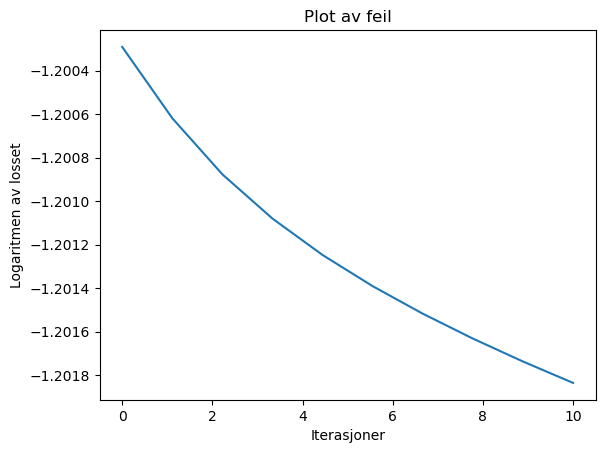

In [7]:
plt.plot(np.linspace(0,len(arr2),len(arr2)),np.log(arr2))
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil')
plt.show()

#### 3.3

In [8]:
#training the module
r = 5
m = 2
d = 10
k = 5
p = 15
L = 2
n_max = 2*r - 1
n_iter = 300
alpha = 0.0001
num_of_samples = 250
num_train_batches = 10
num_test_batches = 1

data = get_train_test_sorting(r, m, num_of_samples, num_train_batches,num_test_batches)

loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1,feed_forward1,attention2, feed_forward2, un_embed_pos, softmax]
nueralnetsort = NeuralNetwork(layers)

x = data['x_train']
y = data['y_train']
x_t = data['x_test'][0]
y_t = data['y_test'][0]

per, y_hat = sorting(nueralnetsort, x_t, y_t,m, r)
print(f'prosent av antall riktige sorteringer før trening er {per*100}%')
for i in range(y_hat.shape[0]):
    print(f'xt = {x_t[i]} yt = {y_t[i]} and z = {y_hat[i]}')
 
arr = algorithm_4_sort(x, y, n_iter, alpha, m, nueralnetsort)


prosent av antall riktige sorteringer før trening er 0.0%
xt = [0. 0. 0. 1. 1.] yt = [0. 0. 0. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [1. 1. 1. 1. 1.] yt = [1. 1. 1. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [1. 0. 1. 0. 0.] yt = [0. 0. 0. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [0. 0. 1. 1. 1.] yt = [0. 0. 1. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [1. 0. 0. 1. 0.] yt = [0. 0. 0. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [0. 1. 0. 0. 1.] yt = [0. 0. 0. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [1. 1. 0. 0. 0.] yt = [0. 0. 0. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [0. 1. 1. 0. 1.] yt = [0. 0. 1. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [1. 0. 0. 1. 0.] yt = [0. 0. 0. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [1. 0. 1. 1. 1.] yt = [0. 1. 1. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [0. 0. 1. 0. 0.] yt = [0. 0. 0. 0. 1.] and z = [1. 1. 0. 0. 1.]
xt = [0. 0. 1. 0. 1.] yt = [0. 0. 0. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [1. 1. 0. 0. 1.] yt = [0. 0. 1. 1. 1.] and z = [1. 1. 0. 0. 1.]
xt = [0. 0. 0. 1. 0.] yt = [0. 0. 0. 0. 1.] a

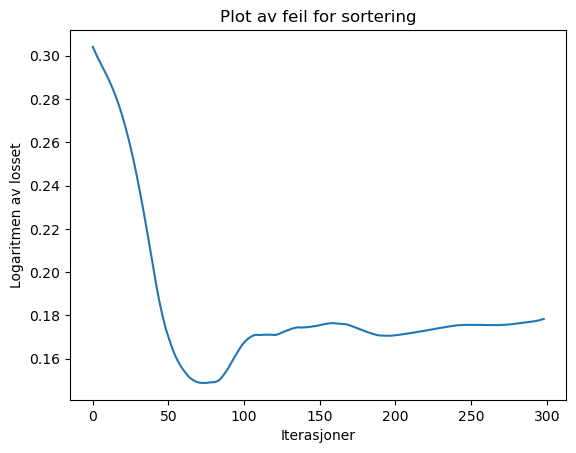

yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [1. 1. 1. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 1. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 1. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 1. 1. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 0. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 1. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 0. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 1. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 0. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0. 1. 1.] and z = [0. 0. 0. 1. 1.]
yt = [0. 0. 0

In [9]:
plt.plot(np.arange(len(arr)),arr)
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil for sortering')
plt.show()
per, z_hat = sorting(nueralnetsort, x_t, y_t,m, r)
np.set_printoptions(threshold=np.inf)

for i in range(250):
    print(f'yt = {y_t[i]} and z = {z_hat[i]}')
print(f'prosent av antall riktige sorteringer etter trening er {per*100}%')

#### 3.4

In [10]:
datapunkter = 250
batches = 20

d = 30
k = 20
p = 40 
L = 3
m = 10
r = 2
n_max = 9
n_iter = 150
alpha = 0.0001

data_add = get_train_test_addition(r+1, datapunkter, batches)

feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
feed_forward3 = FeedForward(d,p)
attention3 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1,feed_forward1, attention2,feed_forward2, attention3,feed_forward3, un_embed_pos, softmax]
nueralnetadd = NeuralNetwork(layers)




In [13]:

x_add = data_add['x_train']
y_add = data_add['y_train']

y_add_t = data_add['y_test'][0]
x_add_t = data_add['x_test'][0]

per, z_hat = sorting(nueralnetadd, x_add_t, y_add_t, m,r+1)
print(f'prosent av antall riktige addisjoner før trening er {per*100}%')

for i in range(y_add_t.shape[0]):
    print(f'yt = {y_add_t[i]} and z = {z_hat[i]}')

arr3 = algorithm_4_add(x_add, y_add, n_iter, alpha, m,r,  nueralnetadd)

prosent av antall riktige addisjoner før trening er 0.0%
yt = [1 2 6 6] and z = [1 0 0]
yt = [0 7 5 3] and z = [0 0 0]
yt = [0 2 6 6] and z = [1 0 0]
yt = [0 5 0 8] and z = [1 0 0]
yt = [0 9 9 3] and z = [1 0 0]
yt = [1 5 2 0] and z = [0 0 0]
yt = [0 7 5 0] and z = [1 0 0]
yt = [0 9 6 0] and z = [1 0 0]
yt = [1 6 0 8] and z = [1 0 0]
yt = [1 1 5 7] and z = [1 0 0]
yt = [1 4 3 9] and z = [1 0 0]
yt = [1 2 6 2] and z = [1 0 0]
yt = [1 7 9 8] and z = [1 0 0]
yt = [1 2 4 0] and z = [1 0 0]
yt = [0 7 2 4] and z = [1 0 0]
yt = [1 2 7 6] and z = [1 0 0]
yt = [0 9 1 0] and z = [1 0 0]
yt = [1 2 8 4] and z = [0 0 0]
yt = [0 6 9 6] and z = [1 0 0]
yt = [1 6 7 6] and z = [1 0 0]
yt = [1 5 0 4] and z = [1 0 0]
yt = [0 9 3 0] and z = [0 0 0]
yt = [0 8 9 1] and z = [1 0 0]
yt = [0 6 8 2] and z = [0 0 0]
yt = [0 0 8 0] and z = [1 0 0]
yt = [1 7 0 0] and z = [0 0 0]
yt = [1 7 0 5] and z = [1 0 0]
yt = [1 2 7 1] and z = [1 0 0]
yt = [0 6 5 9] and z = [1 0 0]
yt = [0 9 4 1] and z = [0 0 0]
yt = [1 2 6 7

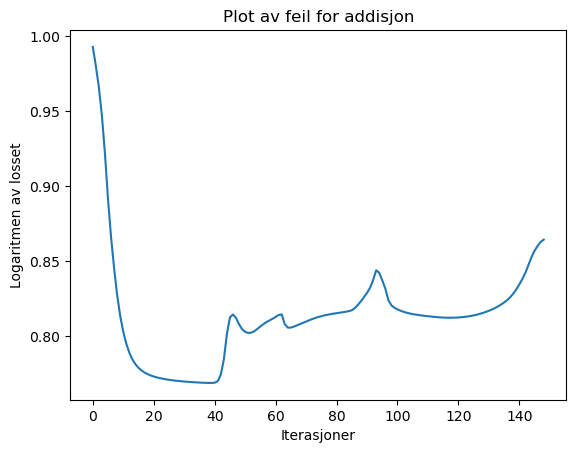

prosent av antall riktige addisjoner er 0.0%
yt = [1 2 8 4] and z = [0 3 4]
yt = [0 9 7 4] and z = [1 8 6]
yt = [1 3 5 1] and z = [0 3 4]
yt = [0 9 0 1] and z = [0 9 1]
yt = [1 0 9 1] and z = [0 3 4]
yt = [0 5 1 0] and z = [0 3 4]
yt = [1 3 1 3] and z = [0 3 4]
yt = [0 5 7 3] and z = [0 3 4]
yt = [1 1 1 3] and z = [0 3 4]
yt = [1 0 4 8] and z = [0 3 4]
yt = [1 0 5 0] and z = [0 3 4]
yt = [0 5 2 2] and z = [0 3 4]
yt = [0 9 1 9] and z = [0 3 4]
yt = [0 8 6 0] and z = [0 3 4]
yt = [0 7 4 6] and z = [0 1 1]
yt = [0 8 4 3] and z = [0 3 4]
yt = [1 3 6 1] and z = [1 8 1]
yt = [0 9 6 1] and z = [0 3 4]
yt = [1 4 4 2] and z = [0 9 1]
yt = [1 4 9 2] and z = [0 3 4]
yt = [1 7 0 7] and z = [0 3 4]
yt = [1 4 5 4] and z = [0 1 1]
yt = [0 9 8 5] and z = [0 3 4]
yt = [1 0 2 8] and z = [0 3 4]
yt = [1 4 1 5] and z = [1 1 4]
yt = [0 3 6 4] and z = [0 3 4]
yt = [1 2 6 4] and z = [0 3 4]
yt = [1 4 9 9] and z = [0 3 4]
yt = [0 9 8 7] and z = [0 3 4]
yt = [1 5 4 9] and z = [1 8 6]
yt = [0 8 0 6] and z = [1

In [ ]:
plt.plot(np.arange(len(arr3)),arr3)
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil for addisjon')
plt.show()

y_add_t = data_add['y_test'][0]
x_add_t = data_add['x_test'][0]

per, z_hat = sorting(nueralnetadd, x_add_t, y_add_t,m,r+1)
print(f'prosent av antall riktige addisjoner er {per*100}%')

for i in range(y_add_t.shape[0]):
    #print(f'x train {x[0][i]} y train{y[0][i]}')
    print(f'yt = {y_add_t[i]} and z = {z_hat[i]}')